파이썬 머신러닝 완벽가이드 ch7. 3 ~ 4 pg. 427 ~ 440

## 03 평균 이동

### (1) 평균 이동의 개요
평균이동 : 중심을 군집의 중심으로 지속적으로 움직이며 군집화 수행
>- K-평균 : 중심에 소속된 데이터의 평균 거리 중심으로 이동
>- 평균 이동 : 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동

- 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는다.
- 군집 중심점 : 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것 이를 위해 확률 밀도 함수를 이용
- 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 서정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation) 이용

평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾아낸다.

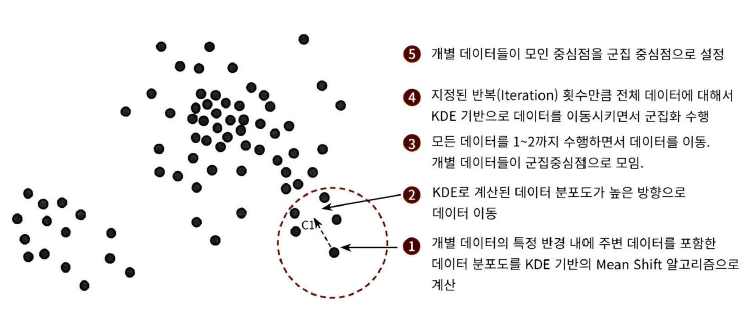

KDE(Kernel Density Estimation)
- 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법
- 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수로 추정.
> 확률 밀도 함수를 알면 특정 변수가 어떤 값을 게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특서, 확률 분포 등 변수의 많은 요소를 알 수 있다.
- KDE는 개별 관측 데이터에 커널 함수(대표 : 가우시안 분포 함수)를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나누어 확률 밀도 함수를 추정

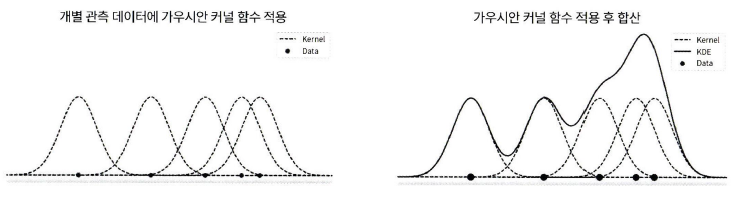

KDE는 커널 함수식으로 표현된다.
> K : 커널함수, x : 확률 변숫값, xi : 관측값, h : 대역폭

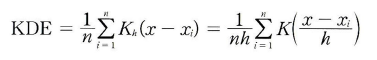

- 대역폭 h : KDE 혀태를 부드러운(또는 뾰족한) 형태로 평활화 하는데 적용, 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다.
> - 작은 h 값 : 좁고 뾰족한 KDE, 과적합이 발생하기 쉬움
>- 큰 h 값 :  과도화게 평활화 된 KDE, 과소적합 될 수 있다.

따라서 적절한 KDE의 대역폭 h를 계산하는 것은 KDE 기반의 평균 이동 군집화에서 중요하다.

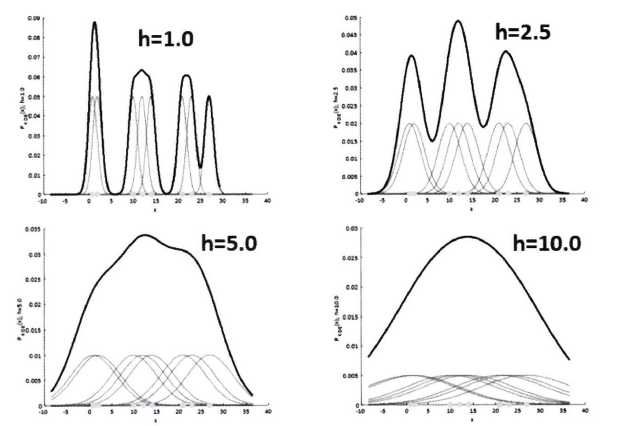

일반적으로 평균 이동 군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집점을 가진다. 또한 평균 이동 군집화는 군집의 개수를 지정하지 않으며, 오직 대역폭의 크기에 따라 군집화를 수행한다.
- MeanShift 클래스의 가장 중요한 초기화 파라미터 : bandwidth -> KDE의 대역폭 h와 동일.
- 최저긔 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공

(예제) make_blobs()의 cluster_std를 0.7로 정한 3개 군집의 데이터에 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘을 적용

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y=make_blobs(n_samples=200,n_features=2,centers=3,cluster_std=0.7,random_state=0)

meanshift=MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 군집이 0부터 5까지 6개로 분류됨. 지나치게 세분화됨.

In [2]:
# bandwidth를 1.0으로
meanshift=MeanShift(bandwidth=1)
cluster_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개 군집으로 잘 군집화됨.

In [3]:
# estimate_bandwidth()의 파라미터로 피처 데이터 세트를 입력하면 최적화된 bandwidth 값을 반환
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(X)
print('bandwidth 값:',round(bandwidth,3))

bandwidth 값: 1.816


In [4]:
# estimate_bandwidth() 로 측정된 bandwidth를 평균 입력값으로 적용해 동일한 make_blos()데이터 세트에 군집화 수행
import pandas as pd

clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth=estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
clsuter_labels=meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집으로 구성됨

<ipython-input-8-e5171892508b>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,edgecolor='k',marker=''%label)


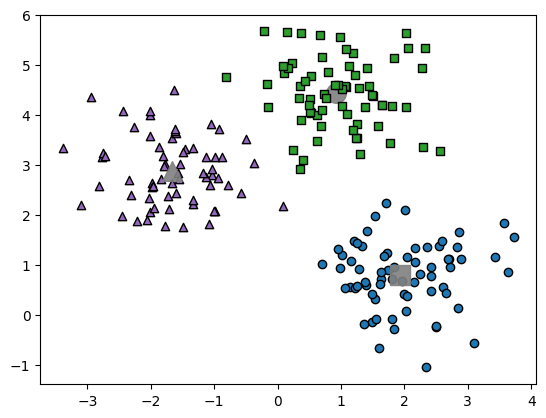

In [8]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']=cluster_labels
centers=meanshift.cluster_centers_
unique_labels=np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
  label_cluster=clusterDF[clusterDF['meanshift_label']==label]
  center_x_y=centers[label]

  # 군집별로 다른 마커로 산점도 적용
  plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'],edgecolor='k',marker=markers[label])

  # 군집별 중심 표현
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=200,color='gray',alpha=0.9,marker=markers[label])
  plt.scatter(x=center_x_y[0],y=center_x_y[1],s=70,edgecolor='k',marker=''%label)

plt.show()

In [10]:
# 타겟과 군집 label 값이 1:1로 잘 매칭됨.
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       1                  67
1       0                  67
2       2                  66
Name: meanshift_label, dtype: int64


평균 이동의 장점
- 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정하지 않기 때무네 좀 더 ㅠㅕㄴ한 군집화가 가능
- 이상치의 영향력이 크지 않으며, 미리 군집의 개수를 정할 필요 x

단점
- 수행 시간이 오래 걸림
- band-width의 크기에 따른 군집화 영향도가 매우 크다

-> 분석 업무 기반의 데이터 세트보다는 CV영역에서 더 많이 사용된다.

## 04 GMM(Gaussian Mixture Model)


### (1) GMM(Gaussian Mixture Model) 소개
GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식.
- GMM 은 데이터를 여러 개의 가우시간 분포가 섞인 것으로 간주

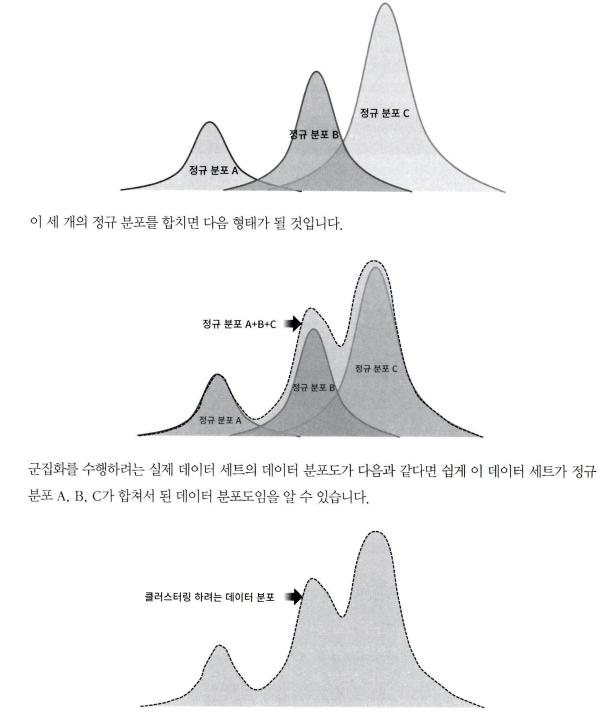

전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러가지 확률 분포 곡선으로 구성될 수 있으며, 이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식
- 데이터 세트가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식

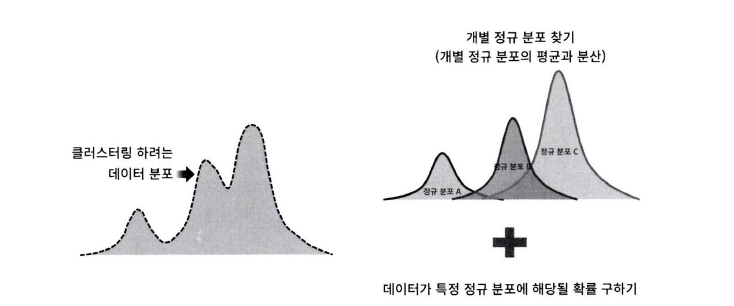

이와 같은 방식은 GMM 에서는 모수 추정이라고 한다
> 모수 추정은 대표적으로 2가지를 추정한다.
>- 개별 정규 분포의 평균과 분산
>- 각 데이터가 어떤 정규 분포에 해당되는지의 확률

이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용, 사이킷런은 EM 바식을 통한 모수 추정 군집화를 지원하기 위해 GaussianMixture 클래스 지원

### (2) GMM을 이용한 붓꽃 데이터 세트 군집화

GMM은 확률 기반 군집화이고, K-평균은 거리 기반 군집화. 이 두 가지 방식을 비교해보자.

In [11]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()
feature_names=['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환

irisDF=pd.DataFrame(data=iris.data,columns=feature_names)
irisDF['target']=iris.target

GaussianMixture 객체의 가장 중요한 초기화 파라미터 : n_components (모델의 총 개수)

In [13]:
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=3,random_state=0).fit(iris.data)
gmm_cluster_labels=gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gmm_cluster'칼럼명으로 저장
irisDF['gmm_cluster']=gmm_cluster_labels
irisDF['target']=iris.target

# target값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result=irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- Target 0 은 cluster 0으로, Target 2는 cluster 1로 모두 잘 매칭 됐다. Target 1만 cluster 2와 cluster 1로 매핑되었다.
- 앞 절의 붓꽃 데이터 세트의 K-평균 군집화 결과보다 더 효과적인 분류 결과 도출

In [14]:
# K - 평균 군집화 수행 결과
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels=kmeans.predict(iris.data)
irisDF['kmeans_cluster']=kmeans_cluster_labels
iris_result=irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- 이는 어떤 알고리즘이 더 뛰어나다는 의미가 아니라 붓꽃 데이터 세트가 GMM 군집화에 더 효과적이라는 의미
- K-펴균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.

### (3) GMM과 K-평균의 비교

- KMeans는 원형의 범위에서 군집화 수행. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다.
- KMeans는 데이터가 타원형으로 늘어선 경우에 군집화를 잘 수행하지 못한다.

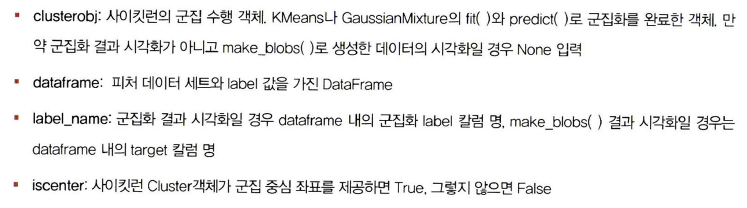

In [15]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

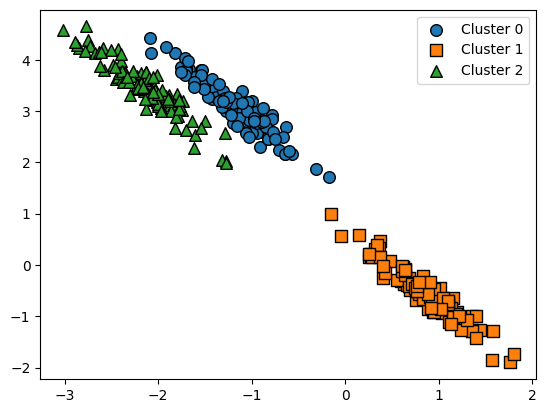

In [16]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y=make_blobs(n_samples=300,n_features=2,centers=3,cluster_std=0.5,random_state=0)

# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함
transformation=[[0.60834549,-0.63667341],[-0.40887718,0.85253229]]
X_aniso=np.dot(X,transformation)
# feature 데이터 세트와 make_blobs()의 y결과값을 DataFrame으로 저장
clusterDF=pd.DataFrame(data=X_aniso,columns=['ftr1','ftr2'])
clusterDF['target']=y
# 생성된 데이터 세트를 target벼로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

- 위와 같이 만들어진 데이터 세트에서는 KMeans의 군집화 정확성이 떨어지게 된다.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-15-f4c266540d94>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


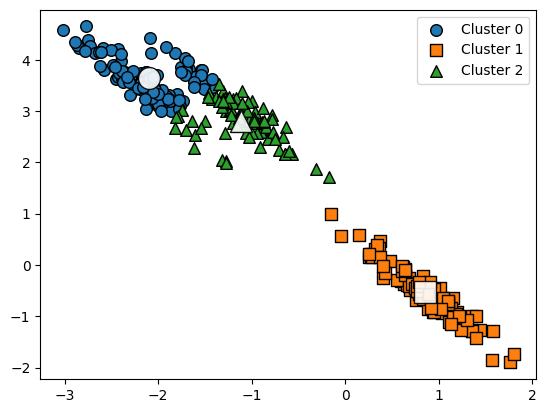

In [17]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans=KMeans(3,random_state=0)
kmeans_label=kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label']=kmeans_label

visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=True)

- KMeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음을 알 수 있다.

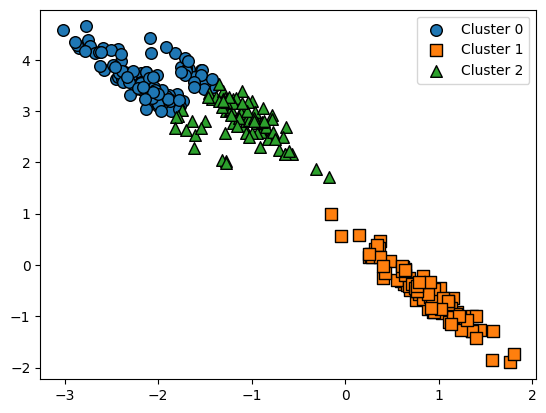

In [18]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm=GaussianMixture(n_components=3,random_state=0)
gmm_label=gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label']=gmm_label

# GaussianMixture은 cluster_centers_속성이 없으므로 iscenter을 false로 설정.
visualize_cluster_plot(kmeans,clusterDF,'kmeans_label',iscenter=False)

- 데이터가 분포된 방향에 따라 정확하게 군집화됐음을 알 수 있다. GMM은 중심 좌표를 구할 수 없기 때문에 군집 중심 표현이 visualize_cluster_plot()에서 시각화되지 않았다.

In [19]:
# 같은 데이터 세트에서 얼만큼의 군집화 효율 차이가 발생하는지 확인
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gausian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gausian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- KMeans의 경우 군집 1번만 정확히 매핑됐지만, 나머지 군집의 경우 target값과 어긋나는 경우가 발생하고 있다.
- GMM의 경우는 군집이 target 값과 잘 매핑돼있다.

GMM은 KMeans 보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있지만 수행 시간이 오래 걸린다.